# Chapter 9

## Question 4

In which we run an SVM on simulated two-class data

### Generate a simulated two-class data set with 100 observations and two features in which there is a visible but non-linear separation between the two classes

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.model_selection
import sklearn.svm
import sklearn.metrics

In [2]:
X1 = np.random.uniform(low=-1, high=+1, size=500)
X2 = np.random.uniform(low=-1, high=+1, size=500)
Y = X1**2 - X2**2 > 0

df = pd.DataFrame({"X1": X1, "X2": X2, "Y": Y})


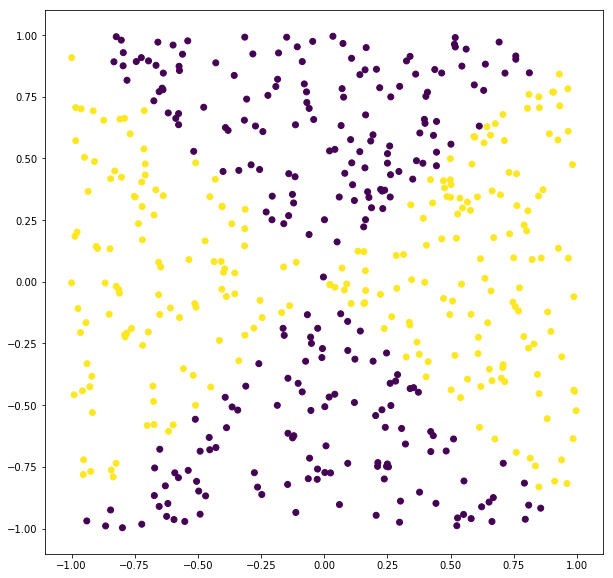

In [3]:
fig, ax = plt.subplots(figsize=(10,10))

ax.scatter("X1", "X2", c="Y", data=df)

### Show that in this setting, an SVM with a polynomial kernel (d>1) or a radial kernel will output an SVC on the training data. Which technique performs best on the test data?

In [4]:
X = df.drop(columns="Y")
y = df.Y
# X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size=0.33)

In [9]:
def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min()*1.1, x.max()*1.1
    y_min, y_max = y.min()*1.1 , y.max()*1.1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out


linear_svm = sklearn.svm.LinearSVC(max_iter=1e4)
linear_params = {"C": [0.01, 0.1, 1.0]}
params = {"gamma": ["auto", "scale"], "C": [0.01, 0.1, 1.0]}
polynomial_svm = sklearn.svm.SVC(kernel="poly", degree=3)
radial_svm = sklearn.svm.SVC(kernel="rbf")


poly_cv = sklearn.model_selection.GridSearchCV(polynomial_svm, params, cv=5).fit(X,y).best_estimator_
radial_cv = sklearn.model_selection.GridSearchCV(radial_svm, params, cv=5).fit(X,y).best_estimator_
linear_cv = sklearn.model_selection.GridSearchCV(linear_svm, linear_params, cv=5).fit(X,y).best_estimator_

/home/will/.local/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Linear
0.396


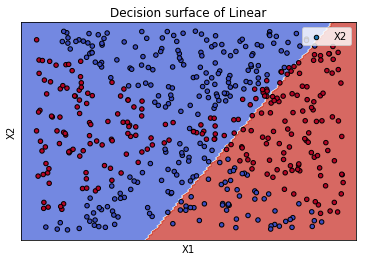

Poly
0.46199999999999997


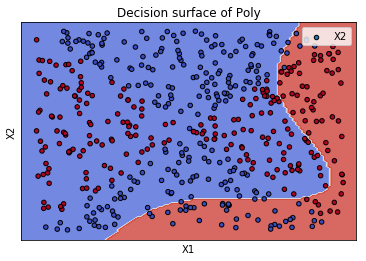

Radial
0.018000000000000016


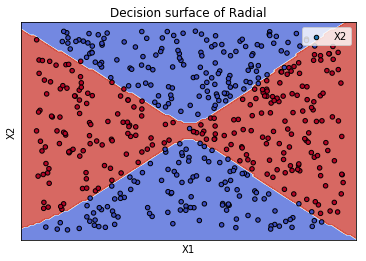

In [10]:

for name, model in zip(["Linear", "Poly", "Radial"],[linear_cv, poly_cv, radial_cv]):
    print(name)
    y_pred = model.predict(X)
    score = sklearn.metrics.zero_one_loss(y, y_pred)
    print(score)   
    fig, ax = plt.subplots()
    # title for the plots
    title = (f'Decision surface of {name}')
    # Set-up grid for plotting.
    X1, X2 = X.X1, X.X2
    xx, yy = make_meshgrid(X1, X2)
    plot_contours(ax, model, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
#     colors = [TEXTTOINT[prediction] for prediction in y]
    ax.scatter(X1, X2, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    ax.set_ylabel('X2')
    ax.set_xlabel('X1')
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)
    ax.legend()
    plt.show()

Looks like the Polynomial kernel performs best, as shown by the plot and the fraction-misclassified score